# 항공기 지연 여부 데이터

## 0. 데이터 준비 및 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

In [114]:
path = 'C:\\WINDOWS\\FONTS\\NANUMPEN.TTF'
fontprop = fm.FontProperties(fname=path)

In [108]:
df_flight = pd.read_csv('./data/flight_delay.csv')
df_airport = pd.read_csv('./data/airports.csv')
df_weather = pd.read_csv('./data/WeatherEvents_Jan2016-Dec2021.csv')
df_flight

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN
999997,TRAIN_999997,6,28,800.0,1340.0,0,0,OAK,13796,NaN,HOU,12191,Texas,1642.0,Southwest Airlines Co.,WN,19393.0,N230WN,NaN
999998,TRAIN_999998,9,27,1613.0,1824.0,0,0,BNA,10693,Tennessee,ATL,10397,NaN,214.0,Delta Air Lines Inc.,DL,19790.0,N968DL,NaN


In [5]:
flight = df_flight.copy()

In [6]:
flight = flight.dropna(subset=['Delay'])

In [7]:
flight.isnull().sum()

ID                              0
Month                           0
Day_of_Month                    0
Estimated_Departure_Time    27841
Estimated_Arrival_Time      27684
Cancelled                       0
Diverted                        0
Origin_Airport                  0
Origin_Airport_ID               0
Origin_State                27856
Destination_Airport             0
Destination_Airport_ID          0
Destination_State           27678
Distance                        0
Airline                     27540
Carrier_Code(IATA)          27888
Carrier_ID(DOT)             27770
Tail_Number                     0
Delay                           0
dtype: int64

In [9]:
delay_mapping = {"Not_Delayed":0,"Delayed":1}
flight["Delay"] = flight["Delay"].map(delay_mapping)

In [10]:
flight.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Delay
count,255001.000000,255001.000000,227160.000000,227317.000000,255001.0,255001.0,255001.000000,255001.000000,255001.000000,227231.000000,255001.00000
mean,6.967996,15.760028,1319.396624,1472.634691,0.0,0.0,12697.605570,12700.041635,779.949455,19995.621531,0.17647
std,3.469944,8.794969,490.941713,517.545954,0.0,0.0,1516.020456,1515.893547,589.255800,403.702782,0.38122
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000,0.00000
25%,4.000000,8.000000,905.000000,1053.000000,0.0,0.0,11292.000000,11292.000000,349.000000,19790.000000,0.00000
50%,7.000000,16.000000,1310.000000,1500.000000,0.0,0.0,12889.000000,12889.000000,620.000000,19977.000000,0.00000
75%,10.000000,23.000000,1730.000000,1910.000000,0.0,0.0,14057.000000,14057.000000,1014.000000,20378.000000,0.00000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000,1.00000


In [11]:
flight = flight.drop(columns=['Cancelled','Diverted'])

## 1. Airline

In [11]:
flight['Airline'].unique()

array(['Republic Airlines', 'United Air Lines Inc.',
       'Southwest Airlines Co.', 'SkyWest Airlines Inc.',
       'Delta Air Lines Inc.', 'Spirit Air Lines', nan,
       'Trans States Airlines', 'JetBlue Airways', 'Alaska Airlines Inc.',
       'Air Wisconsin Airlines Corp', 'Comair Inc.', 'Envoy Air',
       'American Airlines Inc.', 'Mesa Airlines Inc.',
       'ExpressJet Airlines Inc.', 'Capital Cargo International',
       'Hawaiian Airlines Inc.', 'Horizon Air', 'Endeavor Air Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Frontier Airlines Inc.', 'Compass Airlines', 'Allegiant Air',
       'Commutair Aka Champlain Enterprises, Inc.',
       'Empire Airlines Inc.', 'Virgin America', 'Peninsula Airways Inc.',
       'Cape Air'], dtype=object)

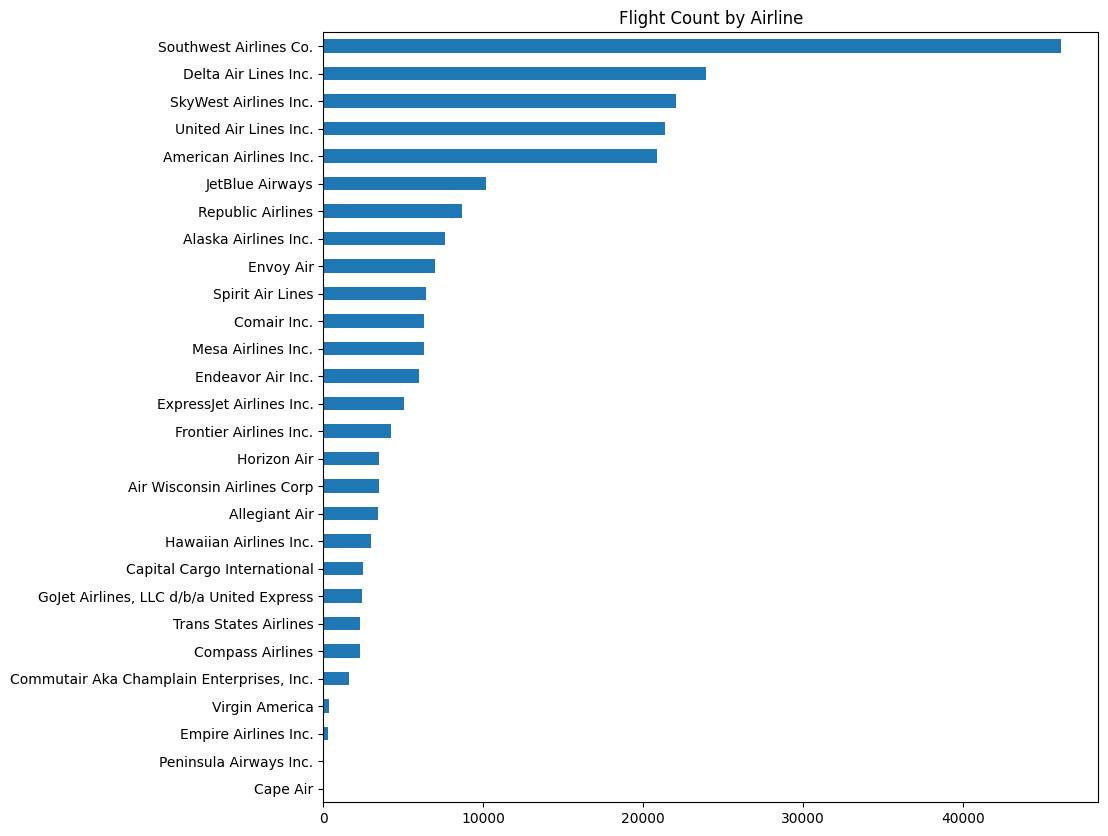

In [12]:
plt.figure(figsize=(10,10))
flight['Airline'].value_counts(sort=True,ascending=True).plot(kind='barh')

plt.title('Flight Count by Airline')
plt.show()

In [13]:
temp_df = pd.DataFrame()
ratio_sr = flight.groupby('Airline')['Delay'].sum() / flight.groupby('Airline')['Delay'].count()

temp_df['Airline'] = ratio_sr.index
temp_df['Delay_Ratio'] = ratio_sr.values

In [14]:
flight = pd.merge(flight,temp_df)

In [15]:
airline_delay_df = pd.DataFrame()

flight_by_airline = flight.groupby('Airline')

airline_delay_df['Airline'] = sorted(flight['Airline'].unique())
airline_delay_df['Count'] = flight_by_airline['Delay'].sum().values
airline_delay_df['Ratio'] = flight_by_airline['Delay_Ratio'].mean().values

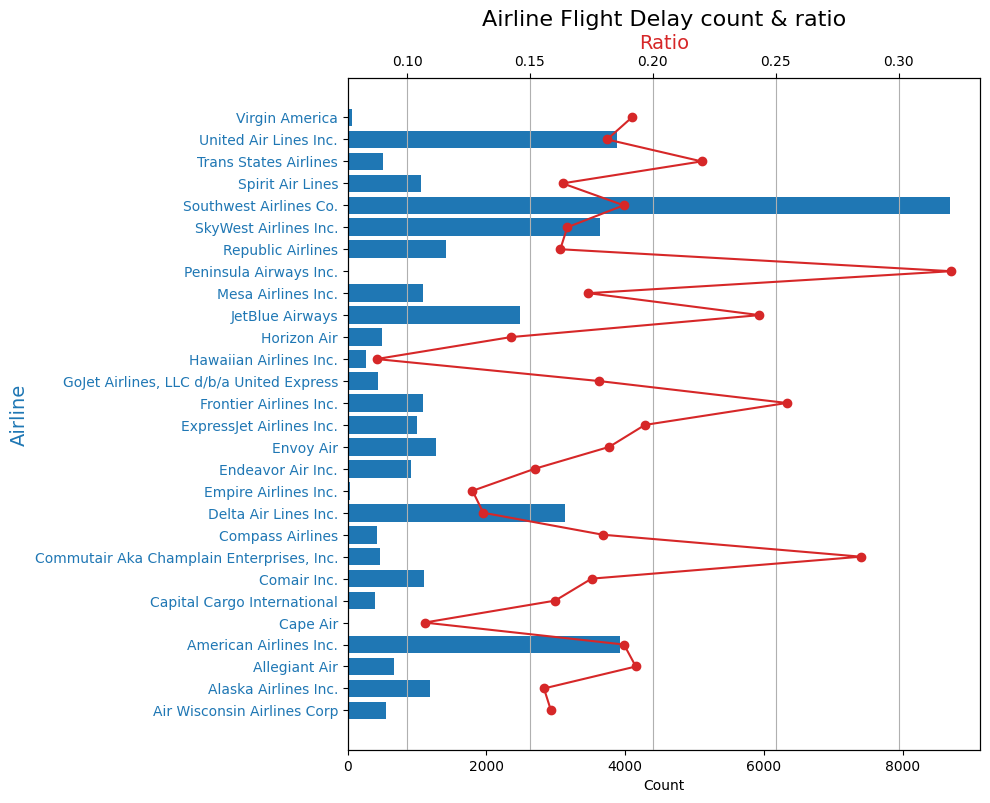

In [16]:
fig = plt.figure(figsize=(10,15))
ax1 = plt.subplot(2, 1, 1)
color_1 = 'tab:blue'
ax1.set_title('Airline Flight Delay count & ratio', fontsize=16)
ax1.set_xlabel('Count')
ax1.set_ylabel('Airline', fontsize=14, color=color_1)
ax1.barh(airline_delay_df.Airline, airline_delay_df.Count, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twiny()
color_2 = 'tab:red'
ax2.set_xlabel('Ratio', fontsize=14, color=color_2)
ax2.plot(airline_delay_df.Ratio, airline_delay_df.Airline, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()

plt.grid(True)
plt.show()

## 2. Airport

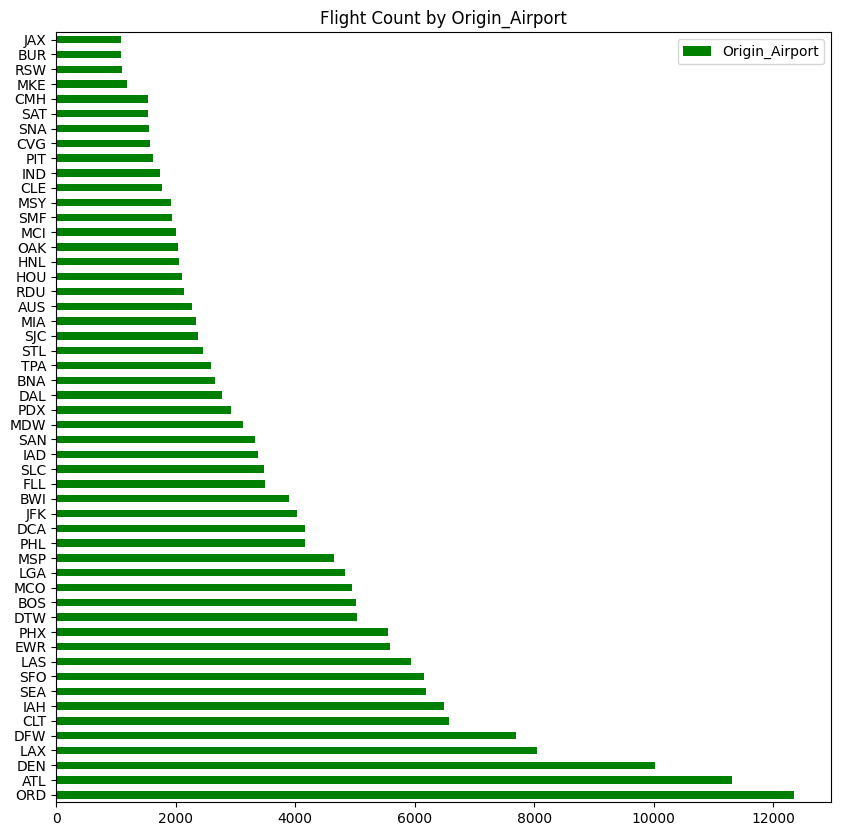

In [165]:
plt.figure(figsize=(10,10))
temp = flight['Origin_Airport'].value_counts(sort=True,ascending=False)
temp[temp>1000]
temp[temp>1000].plot(kind='barh',color='green')

plt.title('Flight Count by Origin_Airport')
plt.legend()
plt.show()

In [166]:
temp = pd.DataFrame(data={'Origin_Airport':temp[temp>1000].index,
                   'Airport_Count':temp[temp>1000]})

In [167]:
temp_flight = flight[flight['Origin_Airport'].isin(temp.index)]

In [168]:
tmep_flight = pd.merge(temp_flight,temp)

In [169]:
temp_df = pd.DataFrame()
ratio_sr = tmep_flight.groupby('Origin_Airport')['Delay'].sum() / tmep_flight.groupby('Origin_Airport')['Delay'].count()

temp_df['Origin_Airport'] = ratio_sr.index
temp_df['OA_Delay_Ratio'] = ratio_sr.values

tmep_flight = pd.merge(tmep_flight,temp_df)

airport_delay_df = pd.DataFrame()

flight_by_airport = tmep_flight.groupby('Origin_Airport')

airport_delay_df['Airport'] = sorted(tmep_flight['Origin_Airport'].unique())
airport_delay_df['Count'] = flight_by_airport['Delay'].sum().values
airport_delay_df['Ratio'] = flight_by_airport['OA_Delay_Ratio'].mean().values

In [170]:
flight_by_airport['Delay']

In [171]:
airport_delay_df = airport_delay_df.sort_values(by='Count',ascending=False)

In [172]:
airport_delay_df[:10]

,Airport,Count,Ratio
35,ORD,2667,0.215864
12,DEN,2026,0.201974
0,ATL,1739,0.153771
13,DFW,1588,0.206207
25,LAX,1418,0.176215
15,EWR,1386,0.248209
45,SFO,1271,0.206331
7,CLT,1122,0.170491
24,LAS,1084,0.182769
20,IAH,1072,0.164948


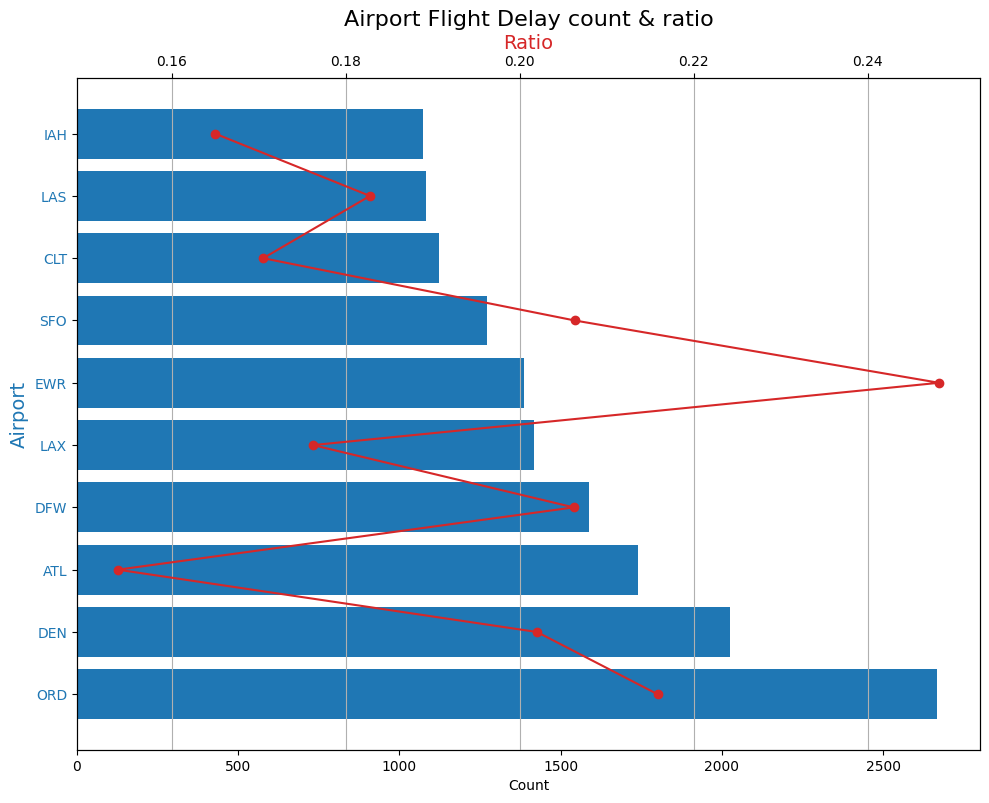

In [173]:
fig = plt.figure(figsize=(10,15))
ax1 = plt.subplot(2, 1, 1)
color_1 = 'tab:blue'
ax1.set_title('Airport Flight Delay count & ratio', fontsize=16)
ax1.set_xlabel('Count')
ax1.set_ylabel('Airport', fontsize=14, color=color_1)

ax1.barh(airport_delay_df[:10].Airport, airport_delay_df[:10].Count, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twiny()
color_2 = 'tab:red'
ax2.set_xlabel('Ratio', fontsize=14, color=color_2)
ax2.plot(airport_delay_df[:10].Ratio, airport_delay_df[:10].Airport, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()

plt.grid(True)
plt.show()

In [174]:
airport_delay_df = airport_delay_df.sort_values(by='Ratio',ascending=False)

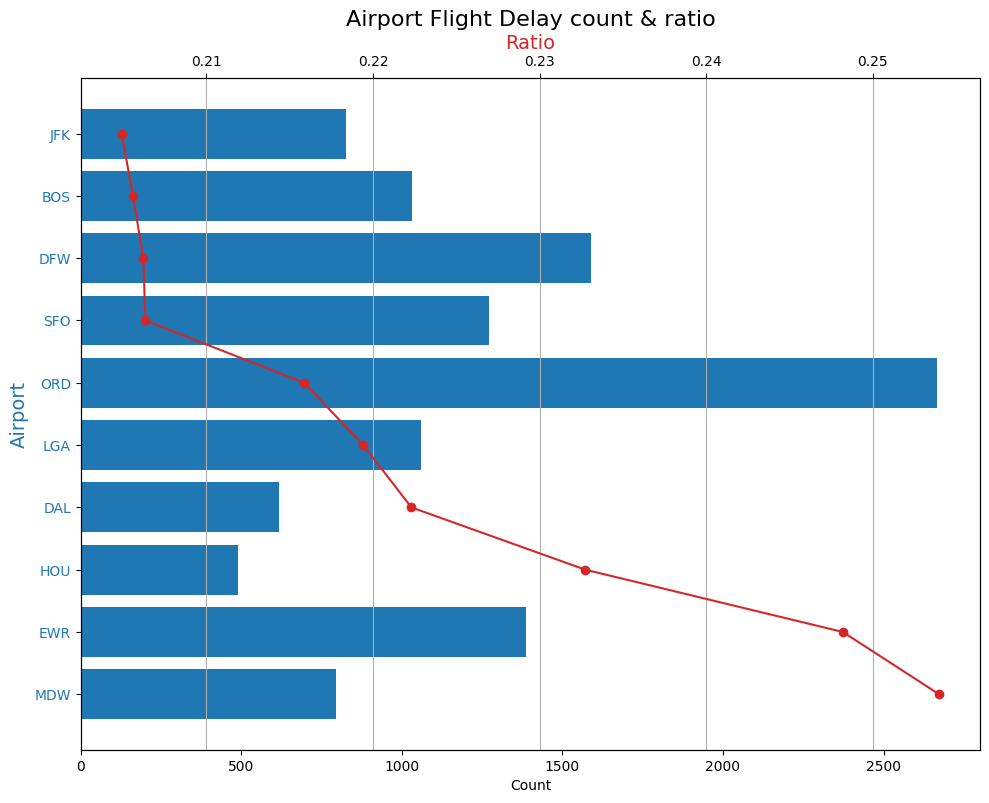

In [175]:
fig = plt.figure(figsize=(10,15))
ax1 = plt.subplot(2, 1, 1)
color_1 = 'tab:blue'
ax1.set_title('Airport Flight Delay count & ratio', fontsize=16)
ax1.set_xlabel('Count')
ax1.set_ylabel('Airport', fontsize=14, color=color_1)

ax1.barh(airport_delay_df[:10].Airport, airport_delay_df[:10].Count, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twiny()
color_2 = 'tab:red'
ax2.set_xlabel('Ratio', fontsize=14, color=color_2)
ax2.plot(airport_delay_df[:10].Ratio, airport_delay_df[:10].Airport, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()

plt.grid(True)
plt.show()

In [26]:
flight[flight['Origin_Airport'] == 'OTH']['Delay']

217772    1
217773    0
217774    1
217775    1
217776    1
217777    1
217778    1
Name: Delay, dtype: int64

## 3. Distance

In [27]:
flight['Distance'].describe()

count    227461.000000
mean        779.916768
std         588.729928
min          16.000000
25%         349.000000
50%         620.000000
75%        1014.000000
max        5095.000000
Name: Distance, dtype: float64

In [28]:
flight[flight['Delay']==1]['Distance'].describe()

count    40165.000000
mean       818.547516
std        600.868382
min         31.000000
25%        370.000000
50%        666.000000
75%       1056.000000
max       5095.000000
Name: Distance, dtype: float64

In [29]:
flight[flight['Delay']==0]['Distance'].describe()

count    187296.000000
mean        771.632534
std         585.764115
min          16.000000
25%         343.000000
50%         607.000000
75%        1009.000000
max        5095.000000
Name: Distance, dtype: float64

In [12]:
flight = flight.sort_values(by='Distance')

In [51]:
dis_range = range(0,6000,500)
labels = [f'{x}~{x+499}' for x in dis_range]
flight['Distance_Category'] = pd.cut(flight['Distance'],bins=dis_range, labels=labels[:-1])

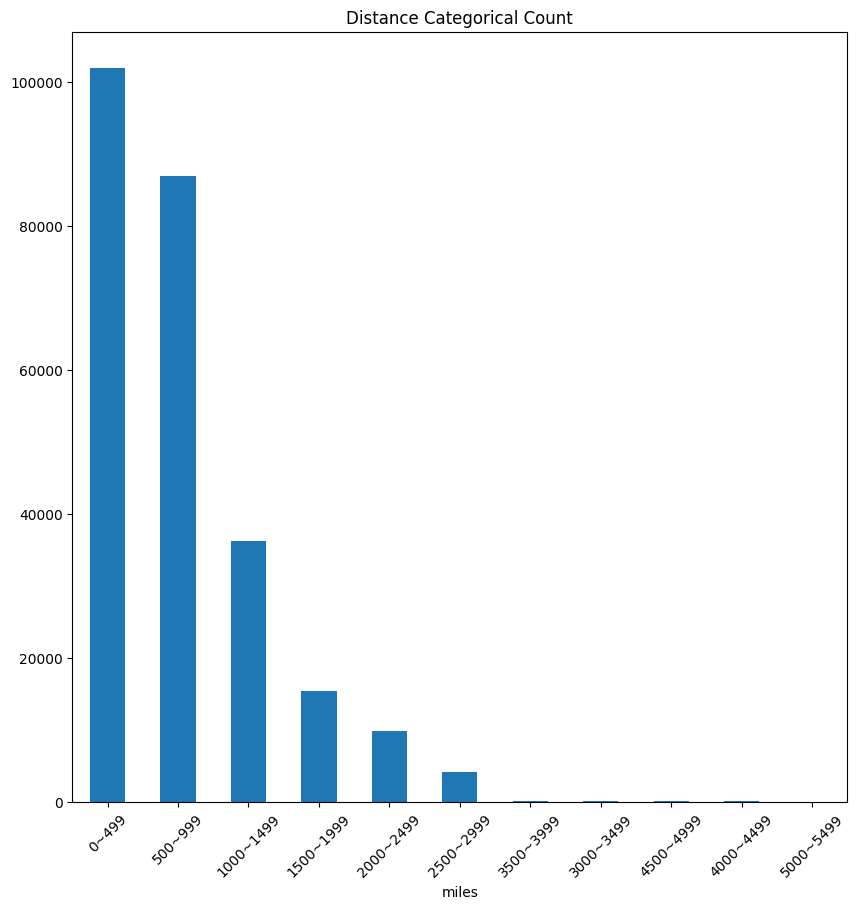

In [161]:
plt.figure(figsize=(10,10))
plt.title('Distance Categorical Count')

flight['Distance_Category'].value_counts().plot(kind='bar')

plt.xlabel('miles')
plt.xticks(rotation=45)
plt.show()

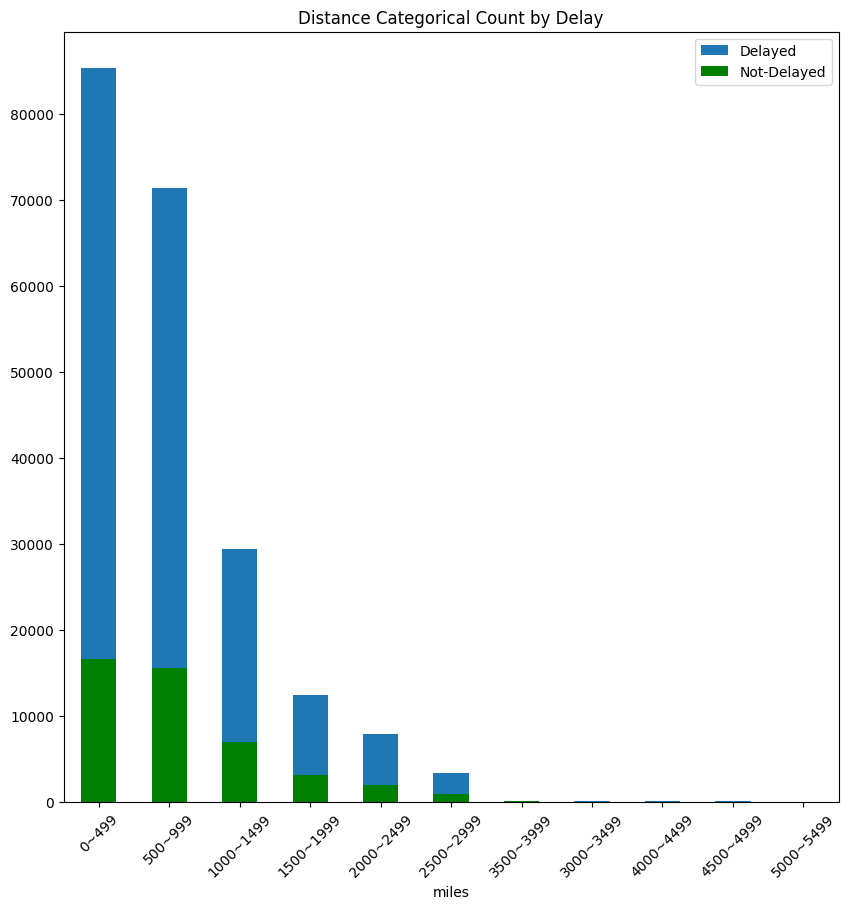

In [163]:
plt.figure(figsize=(10,10))
plt.title('Distance Categorical Count by Delay')

flight[flight['Delay']==0]['Distance_Category'].value_counts().plot(kind='bar')
flight[flight['Delay']==1]['Distance_Category'].value_counts().plot(kind='bar',color='green')

plt.xticks(rotation=45)
plt.xlabel('miles')
plt.legend(labels=['Delayed','Not-Delayed'])
plt.show()

## 4. Delay

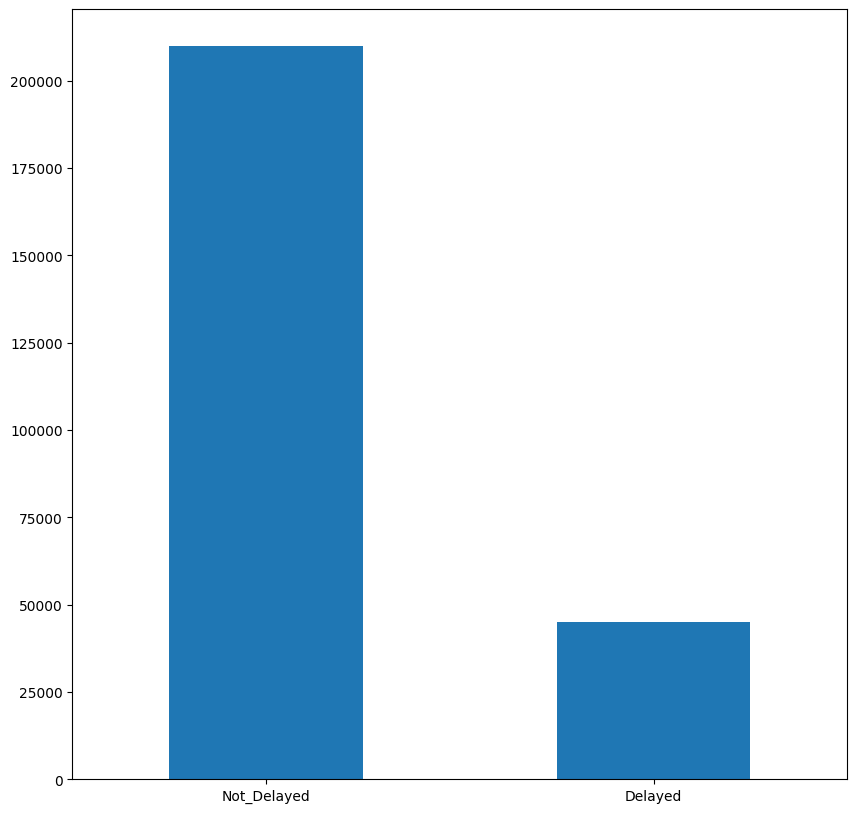

In [67]:
plt.figure(figsize=(10,10))

df_flight['Delay'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

## 5. Weather

In [110]:
df_flight_infos = pd.read_csv('./data/new_flight_delay_ver03.csv')

In [111]:
df_flight_infos.isnull().sum()

Date                       0
Origin_Airport             0
Origin_City             2626
Origin_LAT              2392
Origin_LON              2392
Destination_Airport        0
Des_City                2659
Des_LAT                 2449
Des_LON                 2449
Distance                   0
Airline                27540
Tail_Number                0
Delay                      0
Origin_weather         48273
Des_weather            47955
dtype: int64

In [115]:
flight_infos = df_flight_infos.copy()

In [116]:
delay_mapping = {"Not_Delayed":0,"Delayed":1}
flight_infos["Delay"] = df_flight_infos["Delay"].map(delay_mapping)

In [117]:
flight_infos

,Date,Origin_Airport,Origin_City,Origin_LAT,Origin_LON,Destination_Airport,Des_City,Des_LAT,Des_LON,Distance,Airline,Tail_Number,Delay,Origin_weather,Des_weather
0,04-13,EWR,Newark,40.692497,-74.168661,DCA,Arlington,38.852083,-77.037722,199.0,Republic Airlines,N657RW,0,Rain(Moderate),Fog(Moderate)
1,01-20,EWR,Newark,40.692497,-74.168661,BOS,Boston,42.364348,-71.005179,200.0,United Air Lines Inc.,N66825,0,Rain(Light),NaN
2,06-13,BWI,Baltimore,39.175402,-76.668198,CLT,Charlotte,35.214011,-80.943126,361.0,Southwest Airlines Co.,N765SW,0,Rain(Light),Fog(Severe)
3,08-13,DCA,Arlington,38.852083,-77.037722,PIT,Pittsburgh,40.491466,-80.232871,204.0,Republic Airlines,N119HQ,1,Rain(Light),Rain(Light)
4,01-12,CLE,Cleveland,41.410894,-81.849397,DEN,Denver,39.858408,-104.667002,1201.0,Southwest Airlines Co.,N8696E,0,Fog(Severe),Snow(Light)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254996,10-11,SAT,San Antonio,29.533694,-98.469778,ORD,Chicago,41.979595,-87.904464,1041.0,SkyWest Airlines Inc.,N152SY,0,Rain(Light),Rain(Light)
254997,05-02,LGA,New York,40.777243,-73.872609,DCA,Arlington,38.852083,-77.037722,214.0,NaN,N871RW,1,Fog(Moderate),Rain(Light)
254998,10-10,MFE,McAllen,26.175833,-98.238611,IAH,Houston,29.980472,-95.339722,316.0,Mesa Airlines Inc.,N89321,1,NaN,Rain(Light)
254999,08-08,RDU,Raleigh,35.877639,-78.787472,JAX,Jacksonville,30.494056,-81.687861,407.0,Frontier Airlines Inc.,N316FR,0,Rain(Light),Rain(Light)


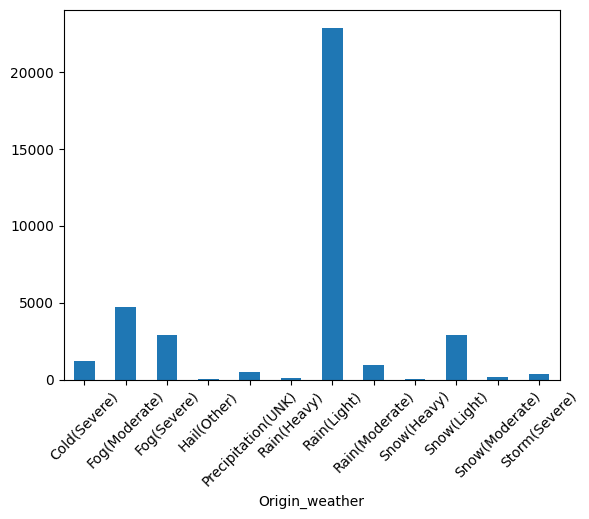

In [127]:
flight_infos.groupby('Origin_weather')['Delay'].sum().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [155]:
delay_by_weather = flight_infos.groupby('Origin_weather')['Delay'].value_counts()

w_type, is_delay = list(zip(*delay_by_weather.index))

temp = pd.DataFrame({"Weather":w_type,
              "Delay":is_delay,
              "Count":delay_by_weather.values})

In [ ]:
x = np.arange(2)
plt.bar(x, temp[['Weather','Delay']], label=0)
plt.bar(x+0.2, temp[['Weather','Delay']], label=1)